In [5]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

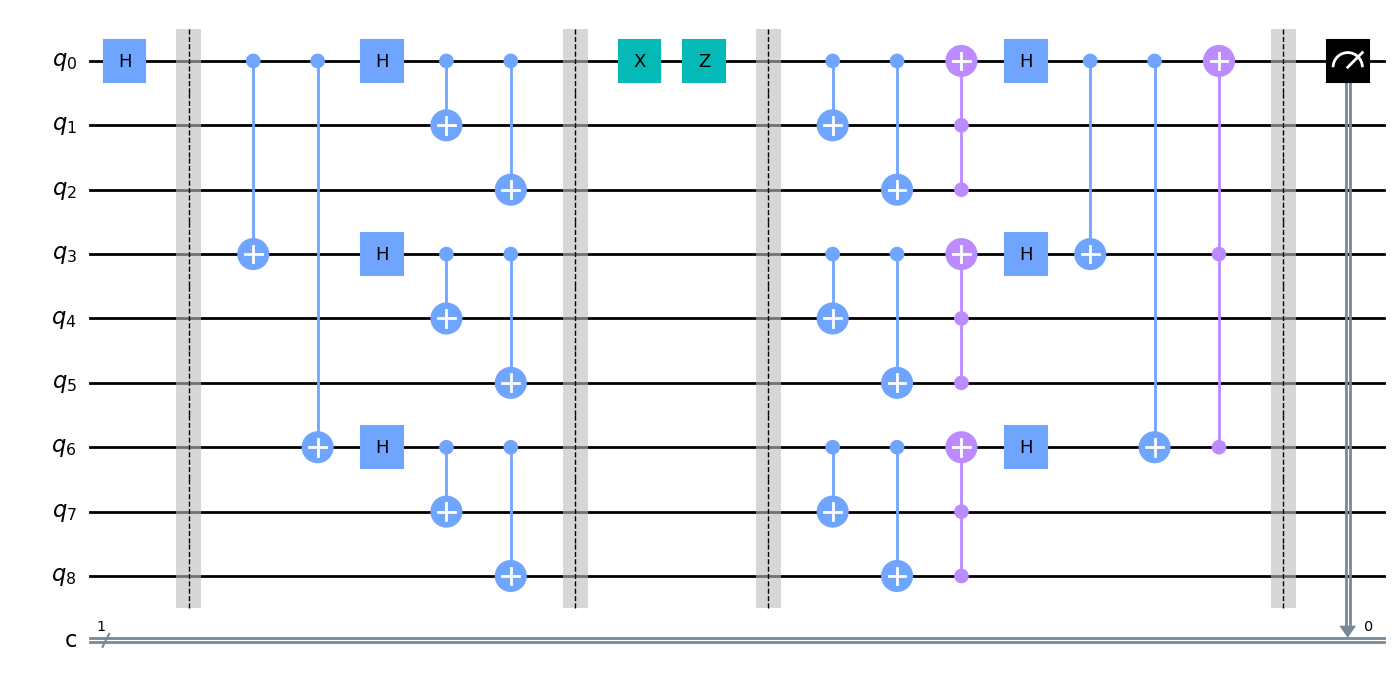

In [6]:
my_Circuit = QuantumCircuit(9, 1)
# CHANGING QUBIT 0
my_Circuit.h([0])
my_Circuit.barrier()
# ENCODING CIRCUIT
my_Circuit.cnot(control_qubit=0, target_qubit=3)
my_Circuit.cnot(control_qubit=0, target_qubit=6)
my_Circuit.h([0, 3, 6])
my_Circuit.cnot(control_qubit=0, target_qubit=1)
my_Circuit.cnot(control_qubit=0, target_qubit=2)
my_Circuit.cnot(control_qubit=3, target_qubit=4)
my_Circuit.cnot(control_qubit=3, target_qubit=5)
my_Circuit.cnot(control_qubit=6, target_qubit=7)
my_Circuit.cnot(control_qubit=6, target_qubit=8)
my_Circuit.barrier()
# INTRODUCTION OF ERRORS
my_Circuit.x(qubit=0)
my_Circuit.z(qubit=0)
my_Circuit.barrier()
# DECODING CIRCUIT
my_Circuit.cnot(control_qubit=0, target_qubit=1)
my_Circuit.cnot(control_qubit=0, target_qubit=2)
my_Circuit.cnot(control_qubit=3, target_qubit=4)
my_Circuit.cnot(control_qubit=3, target_qubit=5)
my_Circuit.cnot(control_qubit=6, target_qubit=7)
my_Circuit.cnot(control_qubit=6, target_qubit=8)
my_Circuit.ccx(control_qubit1=2, control_qubit2=1, target_qubit=0)
my_Circuit.ccx(control_qubit1=5, control_qubit2=4, target_qubit=3)
my_Circuit.ccx(control_qubit1=8, control_qubit2=7, target_qubit=6)
my_Circuit.h([0, 3, 6])
my_Circuit.cnot(control_qubit=0, target_qubit=3)
my_Circuit.cnot(control_qubit=0, target_qubit=6)
my_Circuit.ccx(control_qubit1=6, control_qubit2=3, target_qubit=0)
my_Circuit.barrier()
# MEASURE QUBIT 0
my_Circuit.measure([0], [0])
my_Circuit.draw(output='mpl')

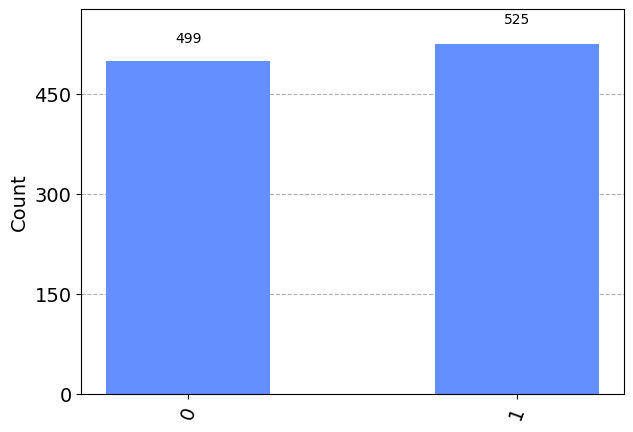

In [11]:
qasm_Simulator = Aer.get_backend('qasm_simulator')
plot_histogram(execute(my_Circuit, backend=qasm_Simulator, shots=1024).result().get_counts())